In [2]:
import os
import time
import uuid
import cv2

In [2]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [4]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(1)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

2023-07-18 13:11:54.840 python[60799:2079783] IMKClient Stall detected, *please Report* your user scenario attaching a spindump (or sysdiagnose) that captures the problem - (imkxpc_bundleIdentifierWithReply:) block performed very slowly (1.06 secs).


In [ ]:
!labelme

2023-07-18 13:28:29.791 python[60934:2085354] +[CATransaction synchronize] called within transaction
2023-07-18 13:33:28.847 python[60934:2085354] +[CATransaction synchronize] called within transaction
2023-07-18 13:33:33.575 python[60934:2085354] +[CATransaction synchronize] called within transaction
2023-07-18 13:38:33.696 python[60934:2085354] +[CATransaction synchronize] called within transaction
2023-07-18 13:43:10.635 python[60934:2085354] +[CATransaction synchronize] called within transaction
2023-07-18 13:43:19.157 python[60934:2085354] +[CATransaction synchronize] called within transaction
2023-07-18 13:43:59.984 python[60934:2085354] +[CATransaction synchronize] called within transaction
2023-07-18 13:44:25.664 python[60934:2085354] +[CATransaction synchronize] called within transaction
2023-07-18 13:44:38.894 python[60934:2085354] +[CATransaction synchronize] called within transaction
2023-07-18 13:44:42.942 python[60934:2085354] +[CATransaction synchronize] called within tr

In [1]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [17]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [18]:
gpu=len(tf.config.list_physical_devices('GPU'))>0
print('gpu is','av' if gpu else 'not')

gpu is not


In [19]:
tf.config.get_visible_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [16]:
tf. __version__ 

'2.13.0'

In [26]:
#images = tf.data.Dataset.list_files('data\\images\\*.jpg',shuffle=False)
images=tf.data.Dataset.list_files("data/images/*.jpg")

In [27]:
images.as_numpy_iterator().next()

b'data/images/312acc2a-253e-11ee-97ae-1eb2aa04711b.jpg'

In [28]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [29]:
images = images.map(load_image)

In [30]:
images.as_numpy_iterator().next()

array([[[159,  62,  73],
        [160,  63,  74],
        [158,  61,  72],
        ...,
        [158, 148, 136],
        [157, 147, 135],
        [156, 146, 134]],

       [[159,  62,  73],
        [164,  67,  78],
        [166,  69,  80],
        ...,
        [158, 148, 136],
        [158, 148, 136],
        [158, 148, 136]],

       [[156,  59,  68],
        [156,  59,  68],
        [160,  63,  72],
        ...,
        [157, 147, 135],
        [158, 148, 136],
        [160, 150, 138]],

       ...,

       [[115,  38,  44],
        [113,  36,  42],
        [113,  36,  42],
        ...,
        [188, 175, 156],
        [186, 175, 155],
        [186, 175, 155]],

       [[111,  34,  40],
        [105,  28,  34],
        [113,  36,  42],
        ...,
        [190, 177, 158],
        [187, 176, 156],
        [186, 175, 155]],

       [[113,  36,  42],
        [ 97,  20,  26],
        [109,  32,  38],
        ...,
        [189, 176, 157],
        [186, 175, 155],
        [183, 172, 152]]

In [38]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

In [39]:
image_generator = images.batch(4).as_numpy_iterator()

In [43]:
plot_images = image_generator.next()

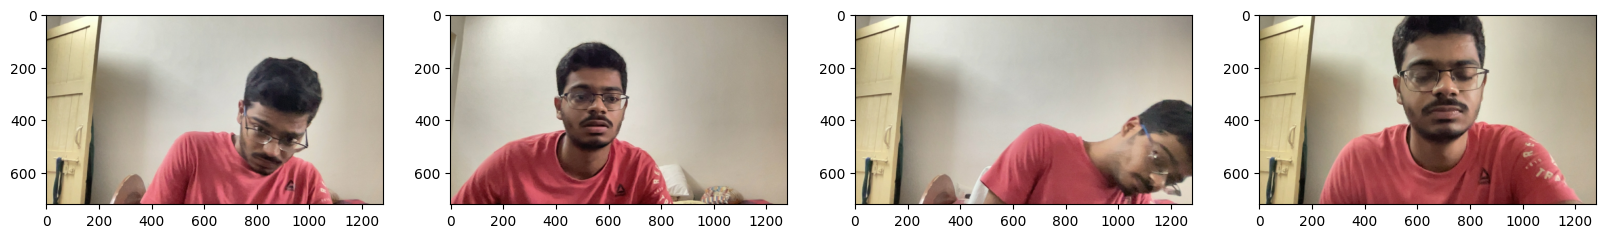

In [44]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

##spliting data 

In [45]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath) 

In [46]:
mg=cv2.imread(os.path.join('data','train','images','2a7224c4-253d-11ee-97ae-1eb2aa04711b.jpg'))
mg.shape

(720, 1280, 3)

#AUGMENTING SINGLE IMG 

In [47]:
import albumentations as alb

In [68]:
# alb.RandomCrop(width=450, height=450)
augmentor = alb.Compose([alb.Resize(width=640, height=480), 
                         alb.RandomCrop(width=450, height=450),
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [93]:
img=cv2.imread(os.path.join('data','train','images','2a7224c4-253d-11ee-97ae-1eb2aa04711b.jpg'))

In [94]:
with open(os.path.join('data', 'train', 'labels', '2a7224c4-253d-11ee-97ae-1eb2aa04711b.json'), 'r') as f:
    label = json.load(f)

In [95]:
type(label),type(label['shapes'])

(dict, list)

In [96]:
label['shapes']

[{'label': 'face',
  'points': [[344.0540540540541, 20.81081081081078],
   [722.4324324324324, 491.0810810810811]],
  'group_id': None,
  'description': '',
  'shape_type': 'rectangle',
  'flags': {}}]

In [97]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [98]:
coords

[344.0540540540541, 20.81081081081078, 722.4324324324324, 491.0810810810811]

In [99]:
coords = list(np.divide(coords, [1280,720,1280,720]))
coords

[0.26879222972972977,
 0.02890390390390386,
 0.5644003378378378,
 0.6820570570570571]

In [100]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [103]:
augmented['bboxes'][0][2:]

(0.9688288288288287, 0.9713913913913914)

In [104]:
augmented['bboxes']

[(0.5484084084084084,
  0.27469469469469454,
  0.9688288288288287,
  0.9713913913913914)]

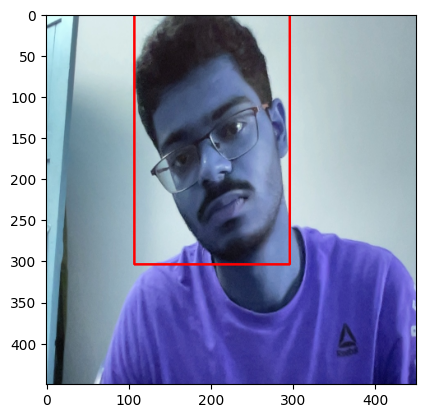

In [78]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

# BUILD AND RUN AUGMENTATION PIPELINE

In [80]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [1280,720,1280,720]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

x_max is less than or equal to x_min for bbox [0.995143581081081, 0.7383633633633634, 0.8536739864864865, 0.01388888888888881, 'face'].
x_max is less than or equal to x_min for bbox [0.7269847972972973, 0.5206456456456456, 0.42990776297880623, 0.0, 'face'].
x_max is less than or equal to x_min for bbox [0.4799408783783784, 0.3855105105105105, 0.1653293918918919, 0.006381381381381364, 'face'].
x_max is less than or equal to x_min for bbox [0.26879222972972977, 0.3404654654654655, 0.0, 0.014488325534837148, 'face'].
x_max is less than or equal to x_min for bbox [0.5095016891891893, 0.4343093093093092, 0.21676411055452008, 0.0, 'face'].
x_max is less than or equal to x_min for bbox [0.24134290540540543, 0.1527777777777778, 0.0027449324324324577, 0.01764264264264257, 'face'].
x_max is less than or equal to x_min for bbox [0.15477195945945948, 0.3029279279279279, 0.0007988033213937485, 0.0, 'face'].
x_max is less than or equal to x_min for bbox [0.5981841216216217, 0.4756006006006006, 0.317

In [106]:
train_images = tf.data.Dataset.list_files('aug_data/train/images/*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [108]:
test_images = tf.data.Dataset.list_files('aug_data/test/images/*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [109]:
val_images = tf.data.Dataset.list_files('aug_data/val/images/*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [110]:
train_images.as_numpy_iterator().next()

array([[[0.4939951 , 0.17389706, 0.19742647],
        [0.53357846, 0.21691176, 0.23995098],
        [0.48939952, 0.17959559, 0.19920343],
        ...,
        [0.7303309 , 0.5597426 , 0.49258578],
        [0.7401348 , 0.5539216 , 0.51305145],
        [0.76709557, 0.5942402 , 0.560049  ]],

       [[0.5109069 , 0.19080882, 0.21372549],
        [0.54025733, 0.22359069, 0.24662991],
        [0.48253676, 0.17273284, 0.19234069],
        ...,
        [0.83860296, 0.547549  , 0.5229167 ],
        [0.8901961 , 0.6137255 , 0.60539216],
        [0.8485907 , 0.6689338 , 0.6338235 ]],

       [[0.54865193, 0.22708334, 0.24276961],
        [0.51666665, 0.19901961, 0.22254902],
        [0.4708946 , 0.16109069, 0.18069853],
        ...,
        [0.9268382 , 0.5689951 , 0.5797794 ],
        [0.89822304, 0.6601103 , 0.63756126],
        [0.7487745 , 0.6528186 , 0.58976716]],

       ...,

       [[0.9085172 , 0.91243875, 0.84969366],
        [0.9023897 , 0.9141544 , 0.84748775],
        [0.90539217, 0

In [111]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [113]:
train_labels = tf.data.Dataset.list_files('aug_data/train/labels/*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [114]:
test_labels = tf.data.Dataset.list_files('aug_data/test/labels/*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [115]:
val_labels = tf.data.Dataset.list_files('aug_data/val/labels/*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [116]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.1866, 0.3481, 0.6133, 1.    ], dtype=float16))

## MAPING OF IMG AND LABELS 

In [117]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3300, 3300, 660, 660, 660, 660)

In [118]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [119]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [120]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [126]:
train.as_numpy_iterator().next()[0].shape

(8, 120, 120, 3)

In [125]:
train.as_numpy_iterator().next()[1]

(array([[0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.    , 0.    , 0.    , 0.    ],
        [0.1761, 0.1194, 0.5425, 0.788 ],
        [0.1624, 0.    , 0.625 , 0.2969],
        [0.    , 0.    , 0.    , 0.    ],
        [0.6836, 0.244 , 1.    , 0.9087],
        [0.3196, 0.7007, 0.782 , 1.    ],
        [0.637 , 0.2488, 1.    , 0.9854],
        [0.5693, 0.3677, 0.963 , 1.    ]], dtype=float16))

In [127]:
data_samples = train.as_numpy_iterator()

In [130]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


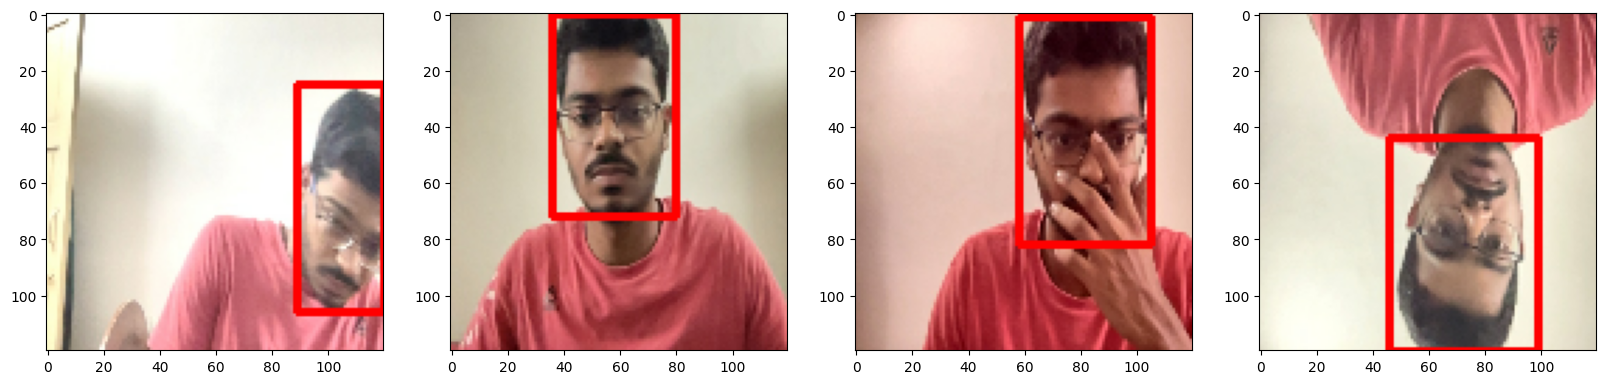

In [131]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

# BUILDING NEURAL NETWORK USING VGG16 

In [133]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [134]:
vgg = VGG16(include_top=False)

58889256/58889256 [==============================] - 13s 0us/step


In [135]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [136]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [137]:
facetracker = build_model()

In [138]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_2[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d (Glob  (None, 512)                  0         ['vgg16[0][0]']               
 alMaxPooling2D)                                                                                  
                                                                                              

In [139]:
X, y = train.as_numpy_iterator().next()

In [140]:
X.shape

(8, 120, 120, 3)

In [141]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 0s 376ms/step


In [142]:
classes, coords #out without passing thr NN

(array([[0.43470305],
        [0.45331576],
        [0.37963274],
        [0.47719288],
        [0.4216116 ],
        [0.43343768],
        [0.36153904],
        [0.4836523 ]], dtype=float32),
 array([[0.72334236, 0.51192284, 0.5172676 , 0.3864833 ],
        [0.6825031 , 0.52126837, 0.60904574, 0.43036637],
        [0.6801354 , 0.4139196 , 0.6279685 , 0.38529176],
        [0.7249251 , 0.45360842, 0.6580487 , 0.3867592 ],
        [0.71299595, 0.5343658 , 0.6002526 , 0.32136235],
        [0.7191249 , 0.49056593, 0.65290976, 0.3587227 ],
        [0.6153565 , 0.4709508 , 0.556966  , 0.4253905 ],
        [0.68487066, 0.46647167, 0.56405157, 0.5298042 ]], dtype=float32))

In [147]:
len(train),3300/8

(413, 412.5)

# TRAINING MODEL 

In [148]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [150]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=lr_decay)

In [151]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [152]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [153]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=7.7128687>

In [154]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.7774466>

In [155]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=7.7128687>

In [156]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [157]:
model = FaceTracker(facetracker)

In [158]:
model.compile(opt, classloss, regressloss)

In [159]:
logdir='logs'

In [160]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [161]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
413/413 [==============================] - 394s 948ms/step - total_loss: 0.4920 - class_loss: 0.1279 - regress_loss: 0.4280 - val_total_loss: 0.3802 - val_class_loss: 0.2685 - val_regress_loss: 0.2460
Epoch 2/10
413/413 [==============================] - 405s 978ms/step - total_loss: 0.1196 - class_loss: 0.0306 - regress_loss: 0.1043 - val_total_loss: 0.0296 - val_class_loss: 0.0031 - val_regress_loss: 0.0281
Epoch 3/10
413/413 [==============================] - 397s 959ms/step - total_loss: 0.0673 - class_loss: 0.0186 - regress_loss: 0.0580 - val_total_loss: 0.0121 - val_class_loss: 7.0920e-05 - val_regress_loss: 0.0121
Epoch 4/10
413/413 [==============================] - 415s 1s/step - total_loss: 0.0658 - class_loss: 0.0188 - regress_loss: 0.0564 - val_total_loss: 0.0242 - val_class_loss: 5.6247e-04 - val_regress_loss: 0.0240
Epoch 5/10
413/413 [==============================] - 473s 1s/step - total_loss: 0.0228 - class_loss: 0.0062 - regress_loss: 0.0197 - val_total_los

In [162]:
hist.history

{'total_loss': [0.03905772790312767,
  0.00731083657592535,
  0.0162165816873312,
  0.004738156683743,
  0.0047311801463365555,
  0.0043745990842580795,
  0.004904063418507576,
  0.001733753364533186,
  0.0031991428695619106,
  0.0038684310857206583],
 'class_loss': [0.006185824051499367,
  0.000994758796878159,
  5.965166928945109e-05,
  0.00025602226378396153,
  6.673137249890715e-05,
  5.8388093748362735e-05,
  7.3016094574995805e-06,
  0.00021099485456943512,
  9.149361176241655e-06,
  0.0013597621582448483],
 'regress_loss': [0.03596481680870056,
  0.006813457235693932,
  0.016186755150556564,
  0.004610145464539528,
  0.004697814583778381,
  0.004345404915511608,
  0.004900412634015083,
  0.0016282559372484684,
  0.0031945682130753994,
  0.003188550006598234],
 'val_total_loss': [0.380202054977417,
  0.0296328105032444,
  0.012099106796085835,
  0.024243362247943878,
  0.01814158447086811,
  0.009826865047216415,
  0.012472288683056831,
  0.03214569017291069,
  0.0112728830426931

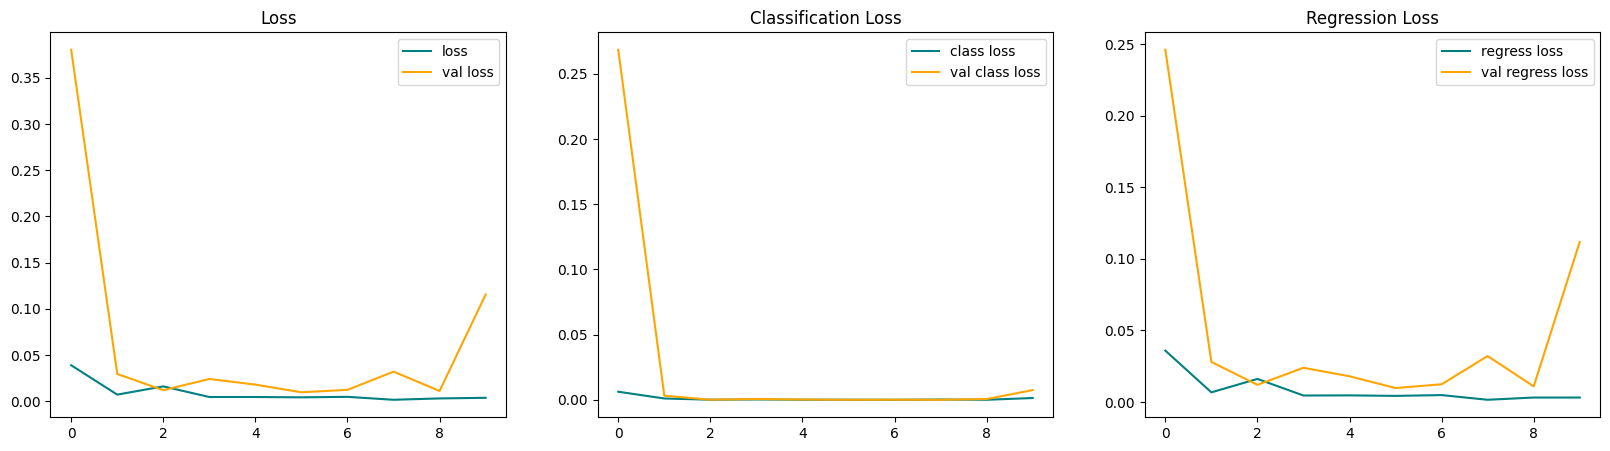

In [163]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

## Predictions on test data

In [164]:
test_data = test.as_numpy_iterator()

In [187]:
test_sample = test_data.next()

In [188]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 252ms/step


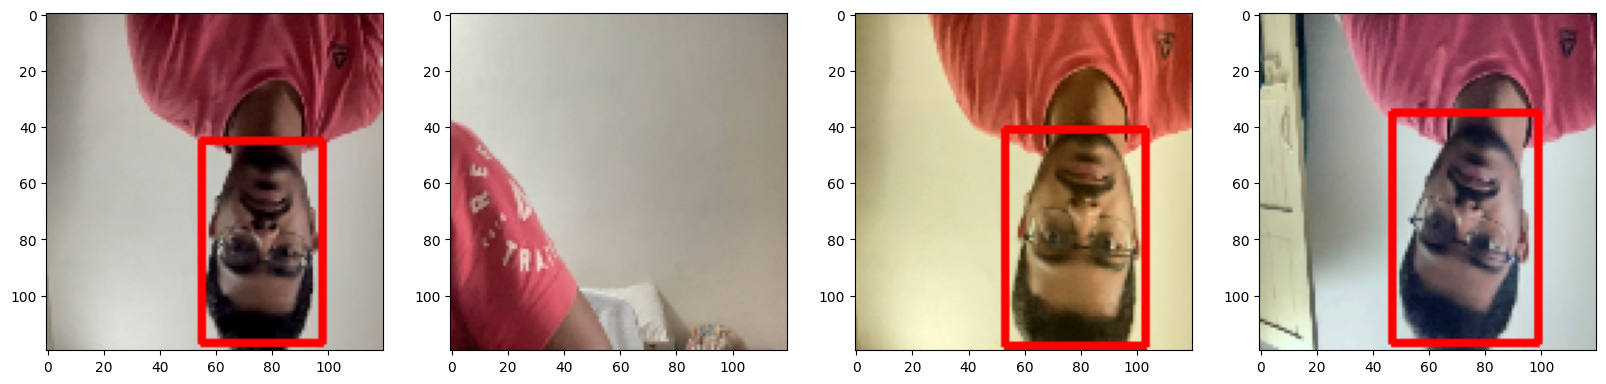

In [189]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [1]:
from tensorflow.keras.models import load_model

In [191]:
facetracker.save('facetracker.h5')

/Users/rishitsehgal/PycharmProjects/face-detection/ocv-venv/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [192]:
facetracker = load_model('facetracker.h5')

# REAL TIME FACE DETECTION

In [193]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 41ms/step
